In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

# Load data
players = pd.read_csv('./Dataset/players.csv')
teams = pd.read_csv('./Dataset/teams.csv')
players_teams = pd.read_csv('./Dataset/players_teams.csv')
awards_players = pd.read_csv('./Dataset/awards_players.csv')
coaches = pd.read_csv('./Dataset/coaches.csv')
series_post = pd.read_csv('./Dataset/series_post.csv')
teams_post = pd.read_csv('./Dataset/teams_post.csv')


In [2]:
print("PLAYERS:")
players.info()
players.describe()

PLAYERS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bioID         893 non-null    object 
 1   pos           815 non-null    object 
 2   firstseason   893 non-null    int64  
 3   lastseason    893 non-null    int64  
 4   height        893 non-null    float64
 5   weight        893 non-null    int64  
 6   college       726 non-null    object 
 7   collegeOther  11 non-null     object 
 8   birthDate     893 non-null    object 
 9   deathDate     893 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 69.9+ KB


,firstseason,lastseason,height,weight
count,893.000000,893.0,893.000000,893.000000
mean,0.001120,0.0,65.500560,145.415454
std,0.033464,0.0,20.940425,61.275703
min,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.0,68.000000,140.000000
50%,0.000000,0.0,72.000000,162.000000
75%,0.000000,0.0,75.000000,180.000000
max,1.000000,0.0,80.000000,254.000000


In [3]:

print("TEAMS:")
number_of_team_ids = teams['tmID'].nunique()
print(number_of_team_ids)
teams.info()
teams.describe()

TEAMS:
20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 61 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        142 non-null    int64  
 1   lgID        142 non-null    object 
 2   tmID        142 non-null    object 
 3   franchID    142 non-null    object 
 4   confID      142 non-null    object 
 5   divID       0 non-null      float64
 6   rank        142 non-null    int64  
 7   playoff     142 non-null    object 
 8   seeded      142 non-null    int64  
 9   firstRound  80 non-null     object 
 10  semis       38 non-null     object 
 11  finals      20 non-null     object 
 12  name        142 non-null    object 
 13  o_fgm       142 non-null    int64  
 14  o_fga       142 non-null    int64  
 15  o_ftm       142 non-null    int64  
 16  o_fta       142 non-null    int64  
 17  o_3pm       142 non-null    int64  
 18  o_3pa       142 non-null    int64  
 19  o_oreb      142 non

,year,divID,rank,seeded,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,...,lost,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend
count,142.000000,0.0,142.000000,142.0,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,5.302817,NaN,4.084507,0.0,860.387324,2039.683099,488.338028,651.366197,157.161972,463.014085,...,16.661972,33.323944,10.169014,6.492958,6.492958,10.169014,10.563380,10.563380,6735.683099,141050.253521
std,2.917274,NaN,2.095226,0.0,86.998969,176.879707,70.749372,86.035246,43.736580,116.166119,...,4.999131,0.949425,2.994017,2.967308,2.702104,2.731409,3.485461,3.485461,197.851093,34714.358519
min,1.000000,NaN,1.000000,0.0,647.000000,1740.000000,333.000000,469.000000,62.000000,205.000000,...,4.000000,32.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,6400.000000,57635.000000
25%,3.000000,NaN,2.000000,0.0,794.500000,1908.500000,435.250000,582.750000,128.250000,389.000000,...,14.000000,32.000000,8.000000,4.250000,5.000000,9.000000,8.000000,8.000000,6500.000000,120897.500000
50%,5.000000,NaN,4.000000,0.0,864.000000,2025.000000,483.500000,650.000000,157.000000,459.000000,...,16.000000,34.000000,11.000000,6.000000,6.000000,10.000000,11.000000,10.000000,6825.000000,135895.500000
75%,8.000000,NaN,6.000000,0.0,915.000000,2177.500000,539.000000,716.500000,180.750000,528.000000,...,20.000000,34.000000,12.000000,8.000000,8.000000,12.000000,13.000000,13.000000,6875.000000,150441.500000
max,10.000000,NaN,8.000000,0.0,1128.000000,2485.000000,668.000000,882.000000,283.000000,802.000000,...,30.000000,34.000000,16.000000,16.000000,13.000000,16.000000,19.000000,19.000000,7025.000000,259237.000000


In [4]:
print("PLAYERS_TEAMS:")
players_teams.info()
players_teams.describe()

PLAYERS_TEAMS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   playerID            1876 non-null   object
 1   year                1876 non-null   int64 
 2   stint               1876 non-null   int64 
 3   tmID                1876 non-null   object
 4   lgID                1876 non-null   object
 5   GP                  1876 non-null   int64 
 6   GS                  1876 non-null   int64 
 7   minutes             1876 non-null   int64 
 8   points              1876 non-null   int64 
 9   oRebounds           1876 non-null   int64 
 10  dRebounds           1876 non-null   int64 
 11  rebounds            1876 non-null   int64 
 12  assists             1876 non-null   int64 
 13  steals              1876 non-null   int64 
 14  blocks              1876 non-null   int64 
 15  turnovers           1876 non-null   int64 
 16  PF       

,year,stint,GP,GS,minutes,points,oRebounds,dRebounds,rebounds,assists,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,...,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,5.326226,0.113539,24.320896,12.438166,501.269190,176.261727,24.388060,54.334755,78.722814,39.031983,...,0.759062,2.623134,3.735075,12.282516,5.149254,3.672708,2.822495,2.924307,1.019723,0.026652
std,2.905475,0.422574,10.460614,13.641697,359.566117,161.983839,23.325974,48.347088,69.210226,40.147037,...,2.280011,5.037807,6.697874,24.313379,10.726421,8.463917,6.723170,7.751034,2.992637,0.170751
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,17.000000,0.000000,165.000000,41.000000,6.000000,15.000000,21.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,29.000000,5.000000,459.000000,129.000000,18.000000,42.000000,63.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,0.000000,32.000000,29.000000,826.250000,284.000000,36.000000,83.000000,119.000000,57.250000,...,0.000000,3.000000,5.000000,15.000000,6.000000,4.000000,2.000000,1.000000,0.000000,0.000000
max,10.000000,3.000000,34.000000,34.000000,1234.000000,860.000000,162.000000,276.000000,363.000000,236.000000,...,31.000000,34.000000,43.000000,188.000000,82.000000,68.000000,62.000000,85.000000,32.000000,2.000000


In [5]:
print("AWARDS_PLAYERS:")
number_of_team_ids = awards_players['award'].nunique()
print(number_of_team_ids)
awards_players.info()
awards_players.describe()

AWARDS_PLAYERS:
12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   playerID  95 non-null     object
 1   award     95 non-null     object
 2   year      95 non-null     int64 
 3   lgID      95 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.1+ KB


,year
count,95.000000
mean,5.789474
std,2.747900
min,1.000000
25%,3.500000
50%,7.000000
75%,8.000000
max,10.000000


In [6]:
print("COACHES:")
number_of_coach_ids = coaches['coachID'].nunique()
print(number_of_coach_ids)
coaches.info()
coaches.describe()

COACHES:
57
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   coachID      162 non-null    object
 1   year         162 non-null    int64 
 2   tmID         162 non-null    object
 3   lgID         162 non-null    object
 4   stint        162 non-null    int64 
 5   won          162 non-null    int64 
 6   lost         162 non-null    int64 
 7   post_wins    162 non-null    int64 
 8   post_losses  162 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 11.5+ KB


,year,stint,won,lost,post_wins,post_losses
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,5.314815,0.364198,14.672840,14.623457,1.166667,1.172840
std,2.896715,0.693861,6.403445,5.678789,1.953656,1.316782
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,3.000000,0.000000,10.000000,11.000000,0.000000,0.000000
50%,5.000000,0.000000,16.000000,15.000000,0.000000,0.000000
75%,8.000000,0.000000,18.750000,18.000000,1.000000,2.000000
max,10.000000,2.000000,28.000000,30.000000,7.000000,5.000000


In [7]:
print("SERIES_POST:")
series_post.info()
series_post.describe()

SERIES_POST:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        70 non-null     int64 
 1   round       70 non-null     object
 2   series      70 non-null     object
 3   tmIDWinner  70 non-null     object
 4   lgIDWinner  70 non-null     object
 5   tmIDLoser   70 non-null     object
 6   lgIDLoser   70 non-null     object
 7   W           70 non-null     int64 
 8   L           70 non-null     int64 
dtypes: int64(3), object(6)
memory usage: 5.1+ KB


,year,W,L
count,70.00000,70.000000,70.000000
mean,5.50000,2.071429,0.614286
std,2.89302,0.259399,0.572127
min,1.00000,2.000000,0.000000
25%,3.00000,2.000000,0.000000
50%,5.50000,2.000000,1.000000
75%,8.00000,2.000000,1.000000
max,10.00000,3.000000,2.000000


In [8]:
print("TEAMS_POST:")
teams_post.info()
teams_post.describe()

TEAMS_POST:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    80 non-null     int64 
 1   tmID    80 non-null     object
 2   lgID    80 non-null     object
 3   W       80 non-null     int64 
 4   L       80 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 3.3+ KB


,year,W,L
count,80.000000,80.000000,80.000000
mean,5.500000,2.350000,2.350000
std,2.890403,2.228129,0.843441
min,1.000000,0.000000,0.000000
25%,3.000000,1.000000,2.000000
50%,5.500000,1.500000,2.000000
75%,8.000000,3.250000,3.000000
max,10.000000,7.000000,5.000000


## Outliers


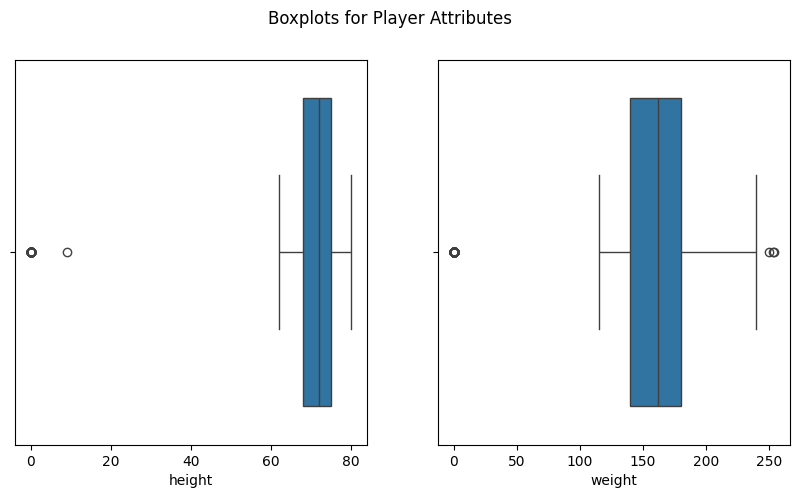

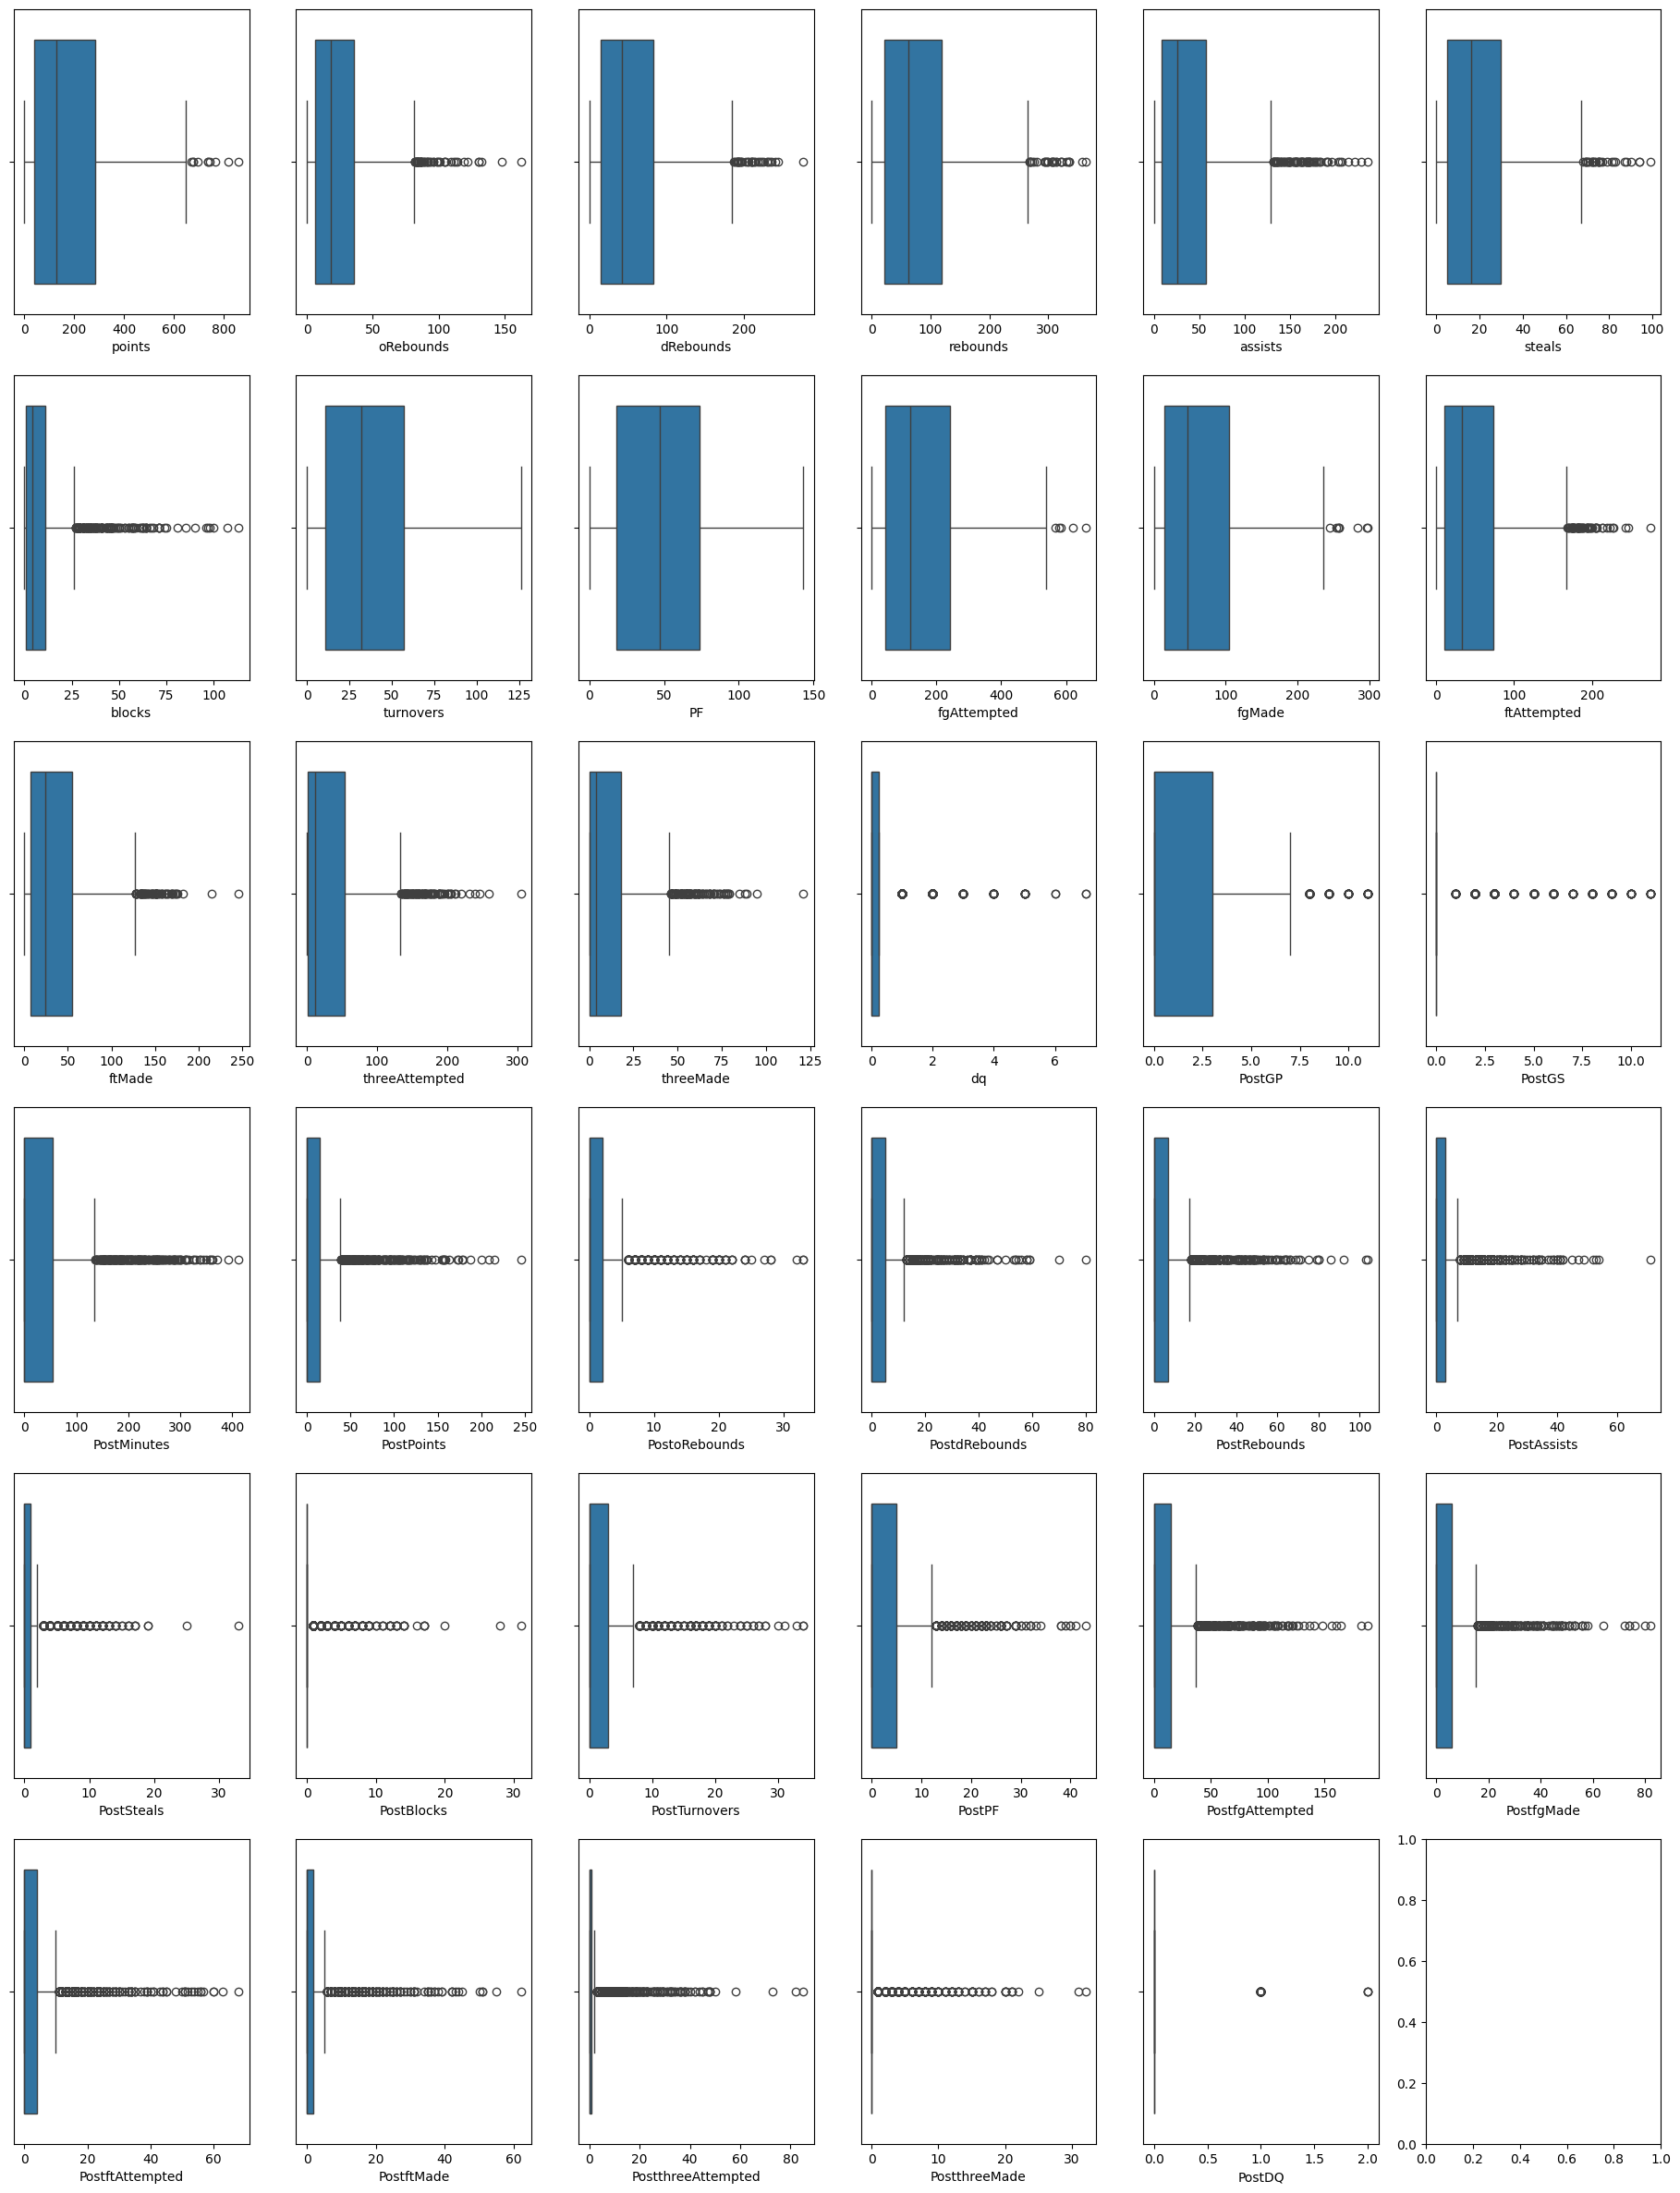

In [9]:

fig, axs = plt.subplots(ncols=2, figsize=(10,5))
for i, attribute in enumerate(players.columns[4:6]):
    col = i % 5
    sns.boxplot(x=players[attribute], ax=axs[col])

fig.suptitle("Boxplots for Player Attributes", fontsize=12)

fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(23, 30))
for i, attribute in enumerate(players_teams.columns[8:45]):
    row = i // 6
    col = i % 6
    sns.boxplot(x=players_teams[attribute], ax=axs[row][col])



---

auxiliary functions:

In [10]:
def plot_two_histograms(df,first_attr,sec_attr):

    if sec_attr is None:
        n_bins1 = int(np.ceil(1 + np.log2(len(df[first_attr]))))
        sns.histplot(data=df, x=first_attr, bins=n_bins1)
        return

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

    #Sturges' rule
    n_bins1 = int(np.ceil(1 + np.log2(len(df[first_attr]))))
    n_bins2 = int(np.ceil(1 + np.log2(len(df[sec_attr]))))

    sns.histplot(data=df, x=first_attr, ax=ax1, bins=n_bins1)
    sns.histplot(data=df, x=sec_attr, ax=ax2, bins=n_bins2)
    plt.show()

def plot_three_barplots(data, first_attr, sec_attr, thr_attr):
    fig, ax = plt.subplots(ncols=3, figsize=(12,8))
    ax[0].bar(data[first_attr].value_counts().index, data[first_attr].value_counts().values)
    ax[0].set_title(first_attr)
    ax[1].bar(data[sec_attr].value_counts().index, data[sec_attr].value_counts().values)
    ax[1].set_title(sec_attr)
    ax[2].bar(data[thr_attr].value_counts().index, data[thr_attr].value_counts().values)
    ax[2].set_title(thr_attr)
    plt.show()

## Missing Values

#### Players

The players who the height is 0 also have the other features set to 0 or null.
The column "lastseason" only contains zero values.

          bioID  pos  firstseason  lastseason  height  weight college  \
5    adamsmi01w  NaN            0           0     0.0       0     NaN   
6    adubari99w  NaN            0           0     0.0       0     NaN   
7    aglerbr99w  NaN            0           0     0.0       0     NaN   
15   allenso99w  NaN            0           0     0.0       0     NaN   
52   beckan99wc  NaN            0           0     0.0       0     NaN   
..          ...  ...          ...         ...     ...     ...     ...   
848  willifr99w  NaN            0           0     0.0       0     NaN   
849  willigr99w  NaN            0           0     0.0       0     NaN   
863  wintebr01w  NaN            0           0     0.0       0     NaN   
872  woolror01w  NaN            0           0     0.0       0     NaN   
890  zierddo99w  NaN            0           0     0.0       0     NaN   

    collegeOther   birthDate   deathDate  
5            NaN  0000-00-00  0000-00-00  
6            NaN  0000-00-00  0000-00

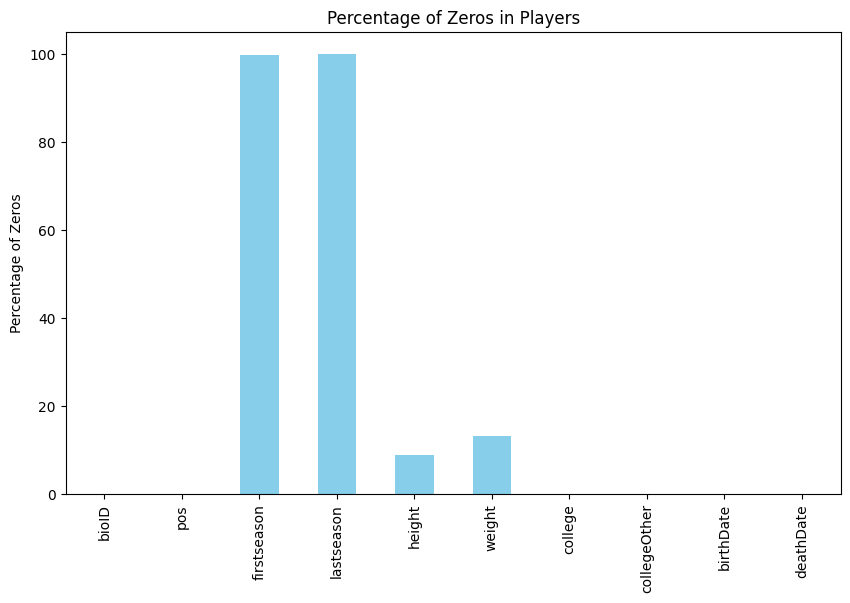

In [11]:

null_heights = players[players['height'] ==  0]
print(null_heights)

zero_percentages = (players == 0).mean() * 100
# Plot the percentages of zeros
plt.figure(figsize=(10, 6))
zero_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Zeros in Players')
plt.ylabel('Percentage of Zeros')
plt.show()


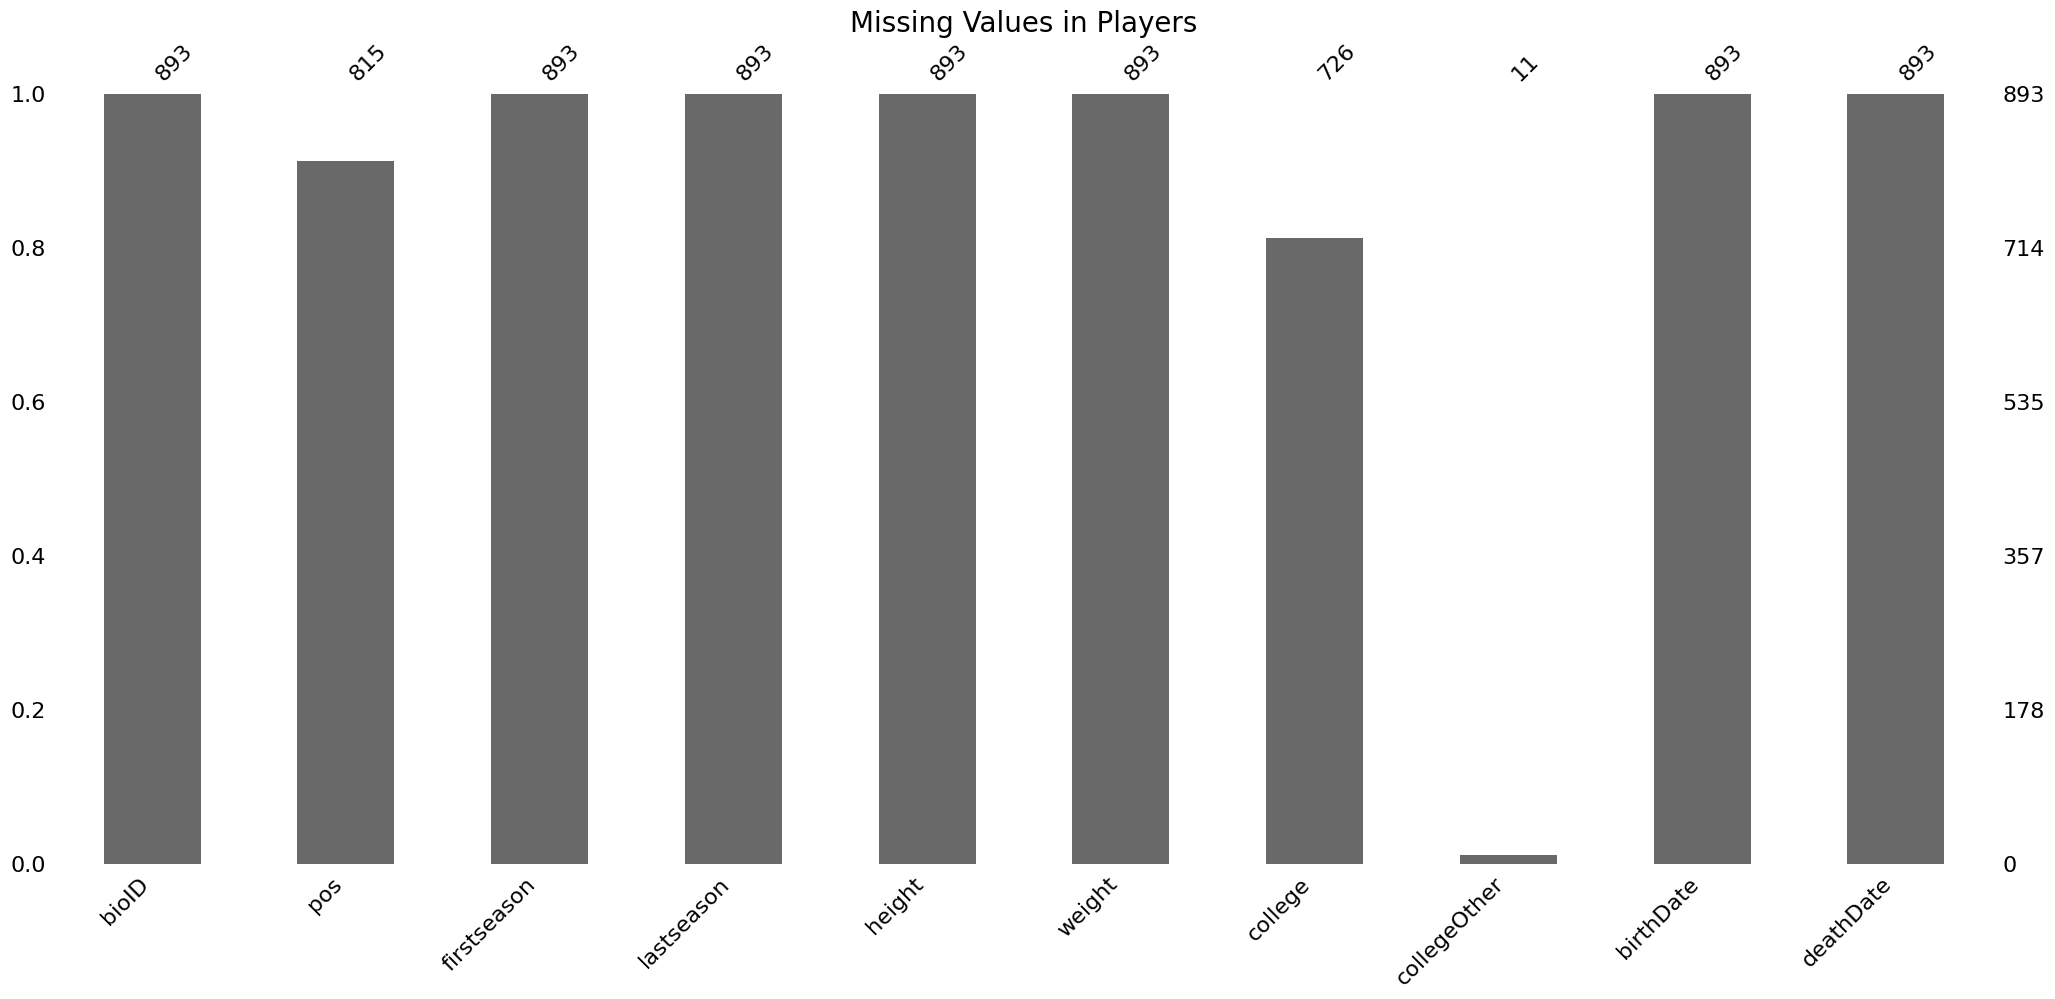

In [12]:
msno.bar(players)
plt.title('Missing Values in Players', fontsize=20)
plt.show()

#### Teams

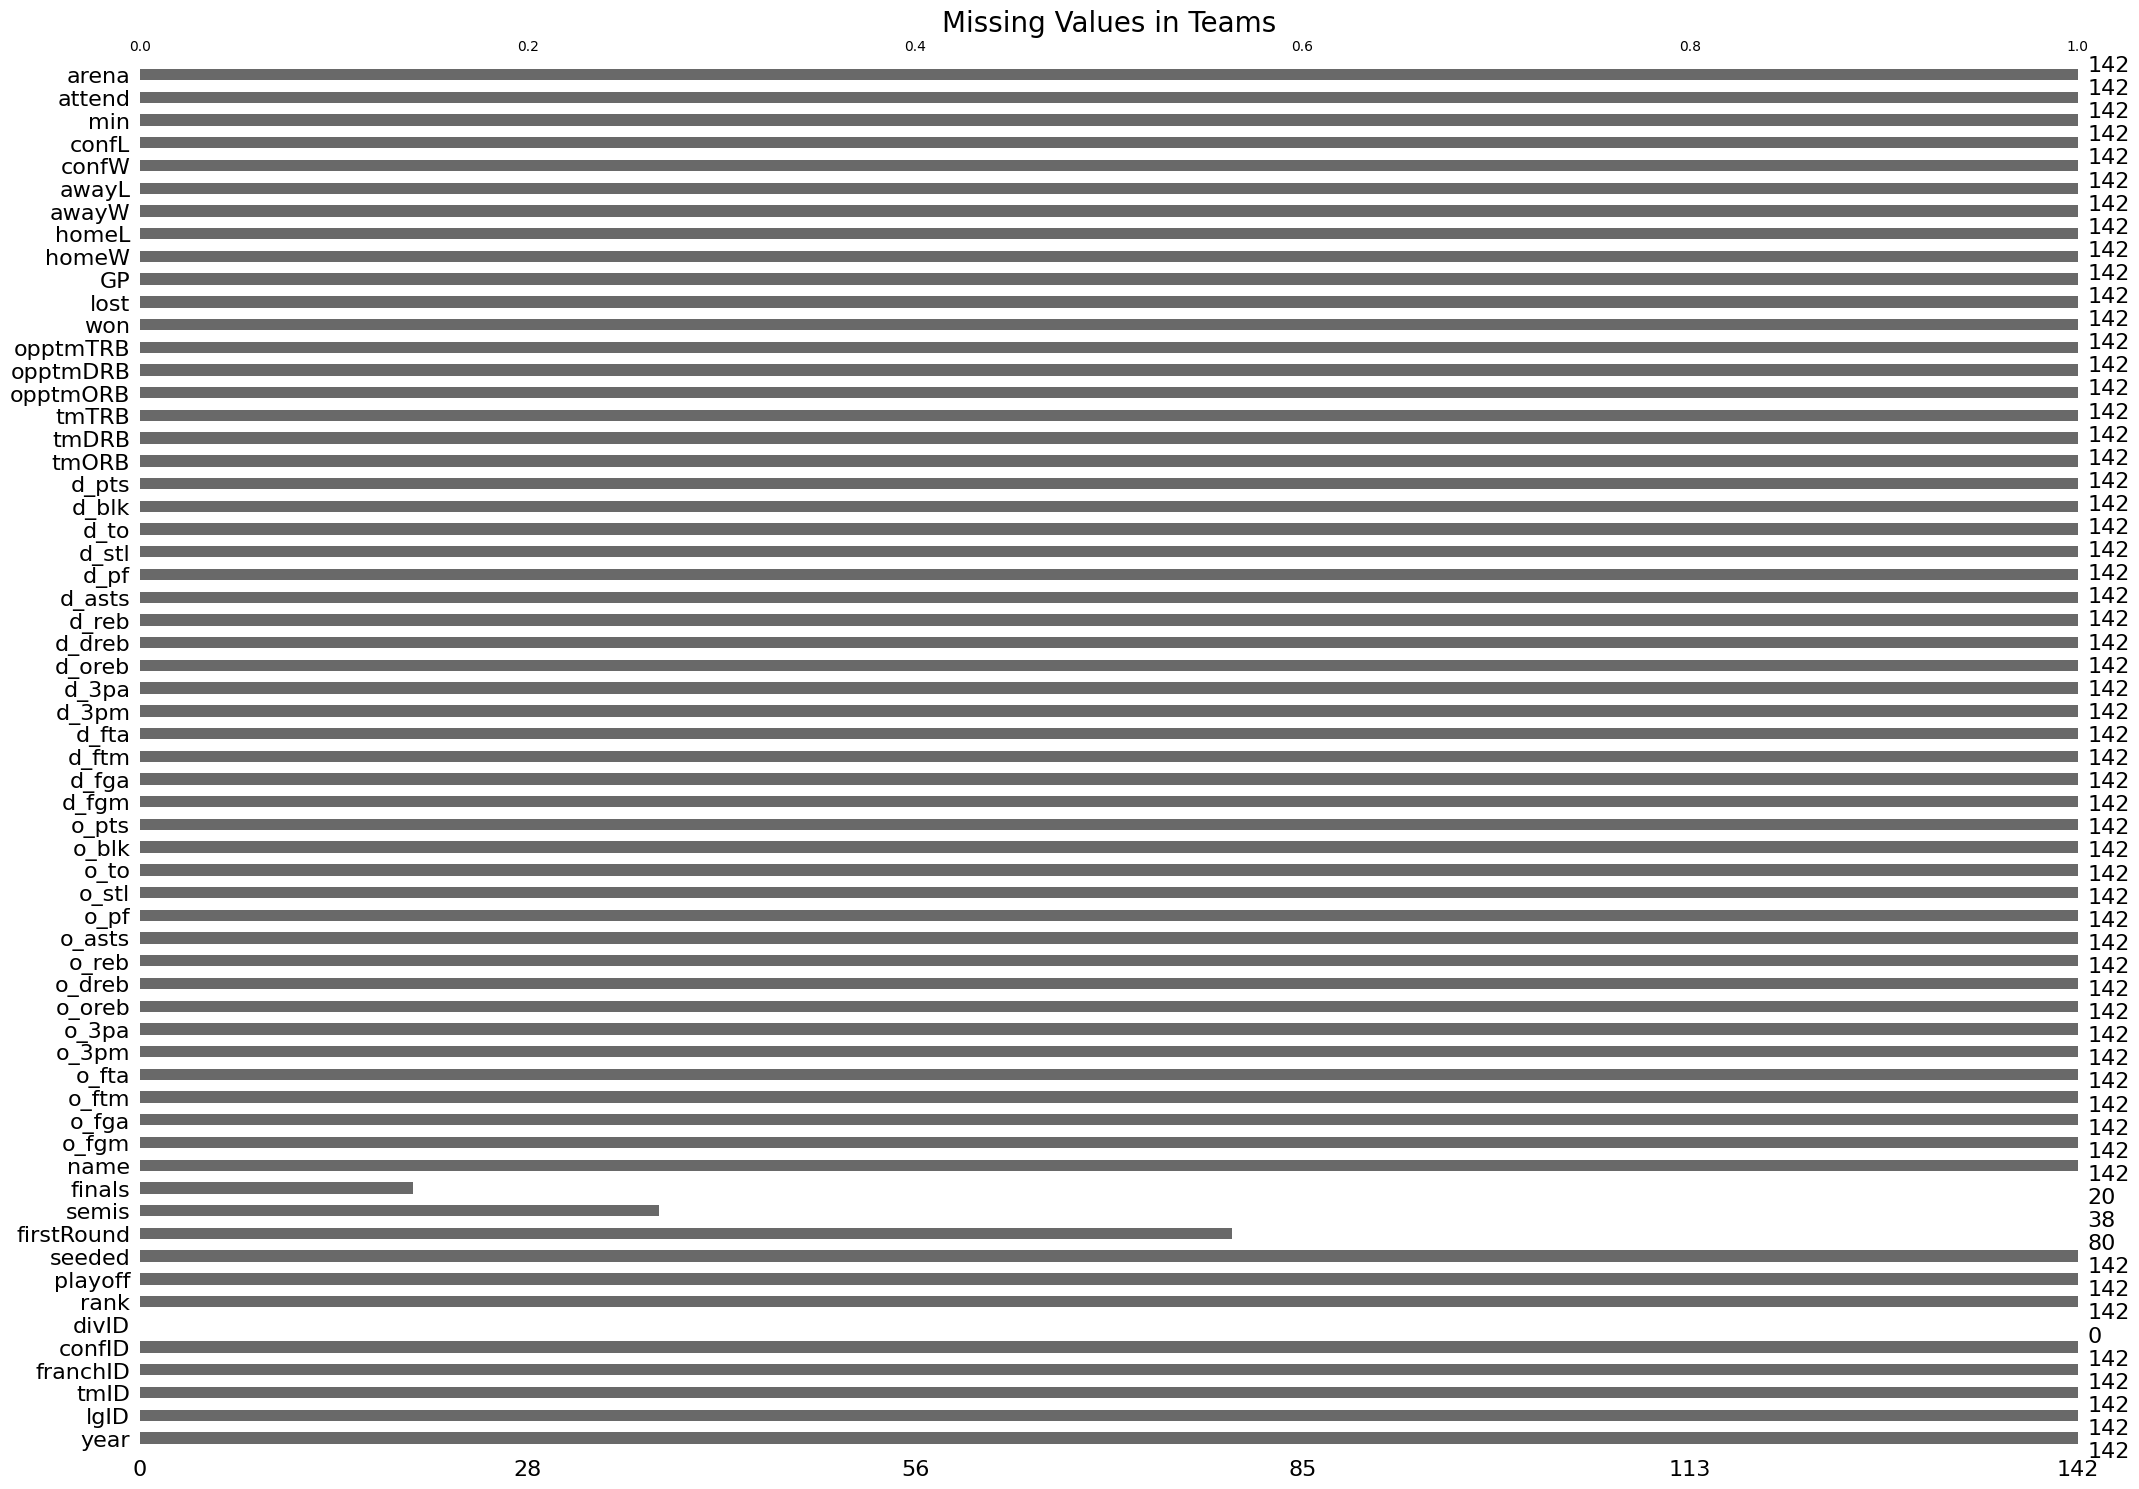

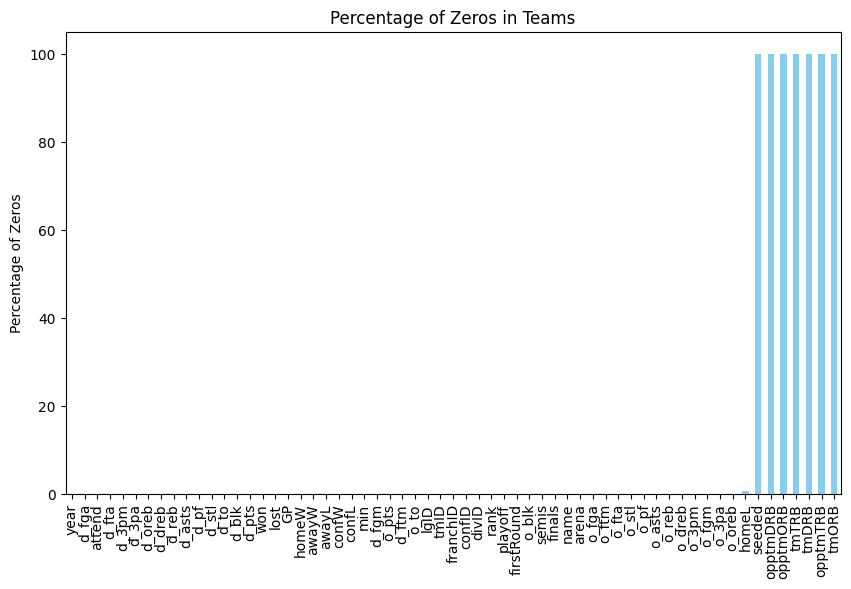

In [13]:

msno.bar(teams)
plt.title('Missing Values in Teams', fontsize=20)
plt.show()

zero_percentages = ((teams == 0).mean() * 100).sort_values()
# Plot the percentages of zeros
plt.figure(figsize=(10, 6))
zero_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Zeros in Teams')
plt.ylabel('Percentage of Zeros')
plt.show()


### Other tables


In [14]:
# Check for missing values
print("---Missing values---")

print("AWARDS_PLAYERS:")
print(awards_players.isnull().sum())

print("COACHES:")
print(coaches.isnull().sum())

---Missing values---
AWARDS_PLAYERS:
playerID    0
award       0
year        0
lgID        0
dtype: int64
COACHES:
coachID        0
year           0
tmID           0
lgID           0
stint          0
won            0
lost           0
post_wins      0
post_losses    0
dtype: int64


In [15]:
print("PLAYERS_TEAMS:")
print(players_teams.isnull().sum())

PLAYERS_TEAMS:
playerID              0
year                  0
stint                 0
tmID                  0
lgID                  0
GP                    0
GS                    0
minutes               0
points                0
oRebounds             0
dRebounds             0
rebounds              0
assists               0
steals                0
blocks                0
turnovers             0
PF                    0
fgAttempted           0
fgMade                0
ftAttempted           0
ftMade                0
threeAttempted        0
threeMade             0
dq                    0
PostGP                0
PostGS                0
PostMinutes           0
PostPoints            0
PostoRebounds         0
PostdRebounds         0
PostRebounds          0
PostAssists           0
PostSteals            0
PostBlocks            0
PostTurnovers         0
PostPF                0
PostfgAttempted       0
PostfgMade            0
PostftAttempted       0
PostftMade            0
PostthreeAttempted    0
P

In [16]:
print("SERIES_POST:")
print(series_post.isnull().sum())

SERIES_POST:
year          0
round         0
series        0
tmIDWinner    0
lgIDWinner    0
tmIDLoser     0
lgIDLoser     0
W             0
L             0
dtype: int64


### Distribution of Numeric Variables

#### Players

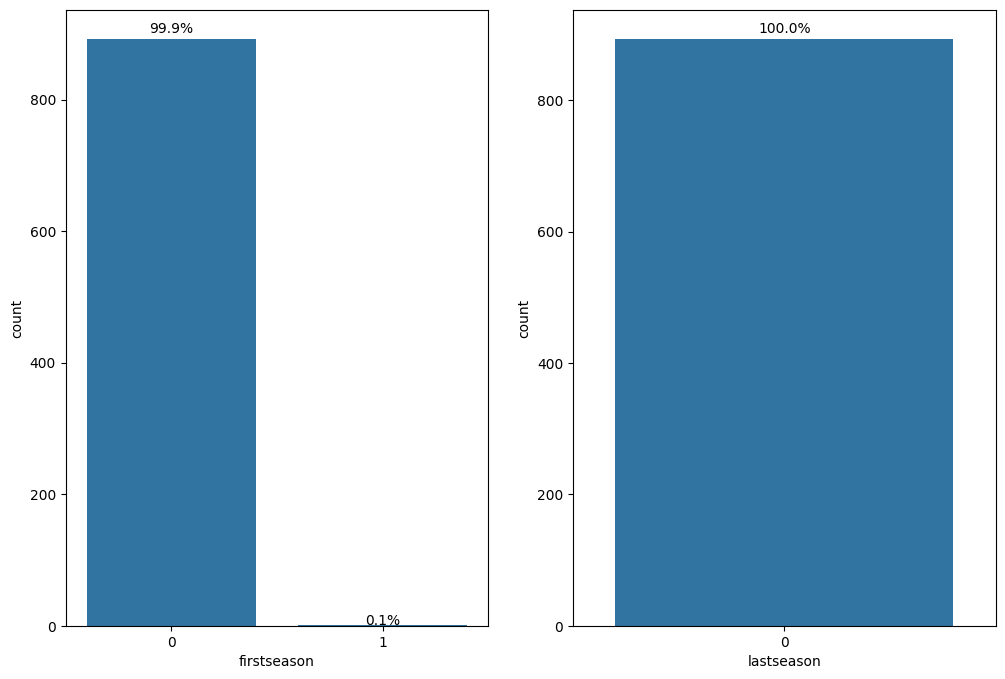

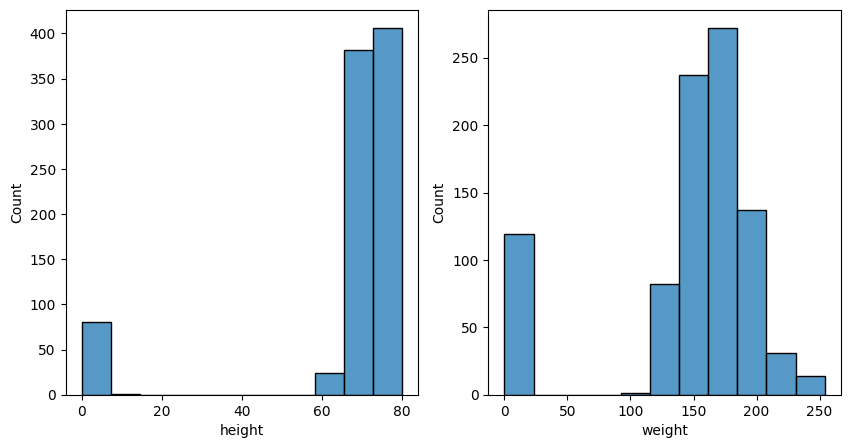

In [17]:
# Function to plot 2 consecutive count plots
def two_countplots(df,first_attr,sec_attr):
    fig, axes = plt.subplots(1, 2, figsize=(12, 8))

    sns.countplot(x=first_attr, data=df, ax=axes[0])
    sns.countplot(x=sec_attr, data=df, ax=axes[1])

    for ax in axes:
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2,
                    height*1.01,
                    f"{height / len(df) * 100:.1f}%",
                    ha="center")

    plt.show()

two_countplots(players, "firstseason", "lastseason")
plot_two_histograms(players,"height","weight")


### Coaches

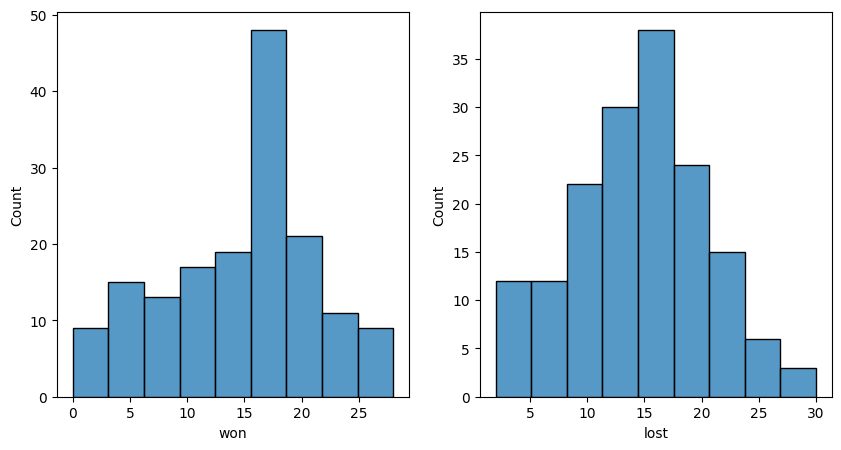

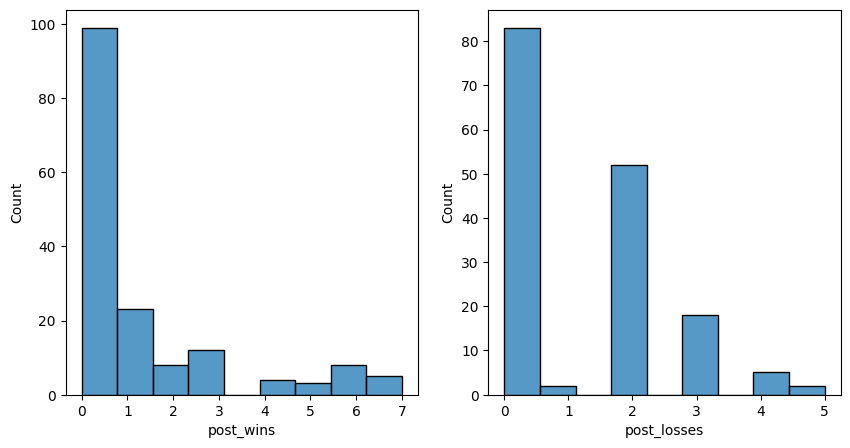

In [18]:
plot_two_histograms(coaches, "won", "lost")
plot_two_histograms(coaches,"post_wins","post_losses")

### Distribution of Categorical Variables

players

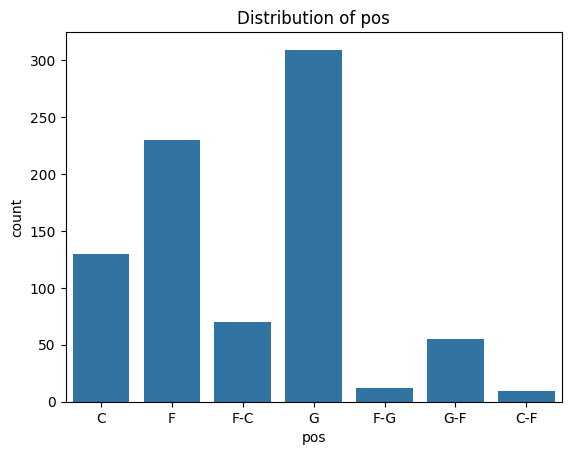

Number of unique values in college column: 160


In [19]:
sns.countplot(x="pos", data=players)
plt.title('Distribution of pos')
plt.show()

unique_values_count = players['college'].nunique()
print(f'Number of unique values in college column: {unique_values_count}')

Teams

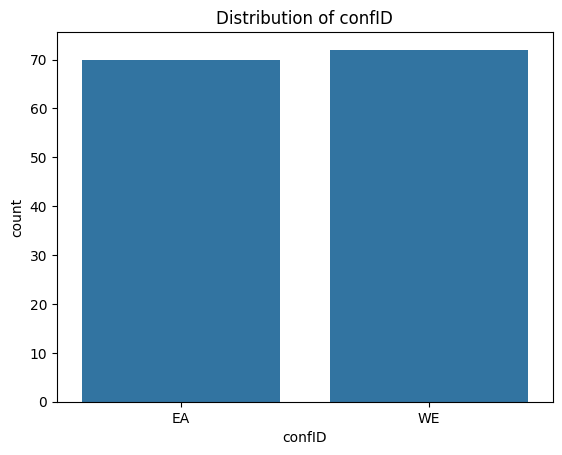

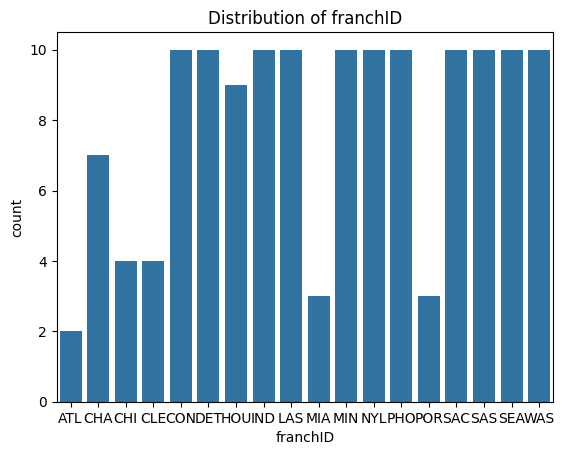

C:\Users\bruna\AppData\Local\Temp\ipykernel_1660\2811879839.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="name", data=teams, palette="colorblind")


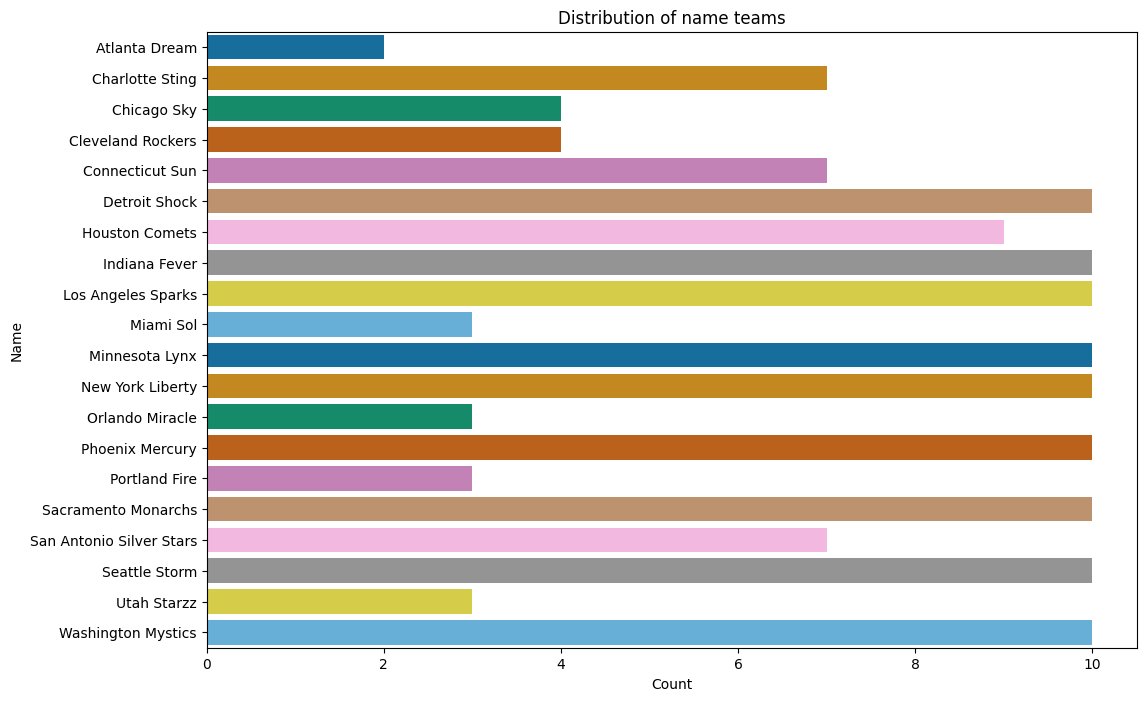

C:\Users\bruna\AppData\Local\Temp\ipykernel_1660\2811879839.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="arena", data=teams, palette="colorblind")


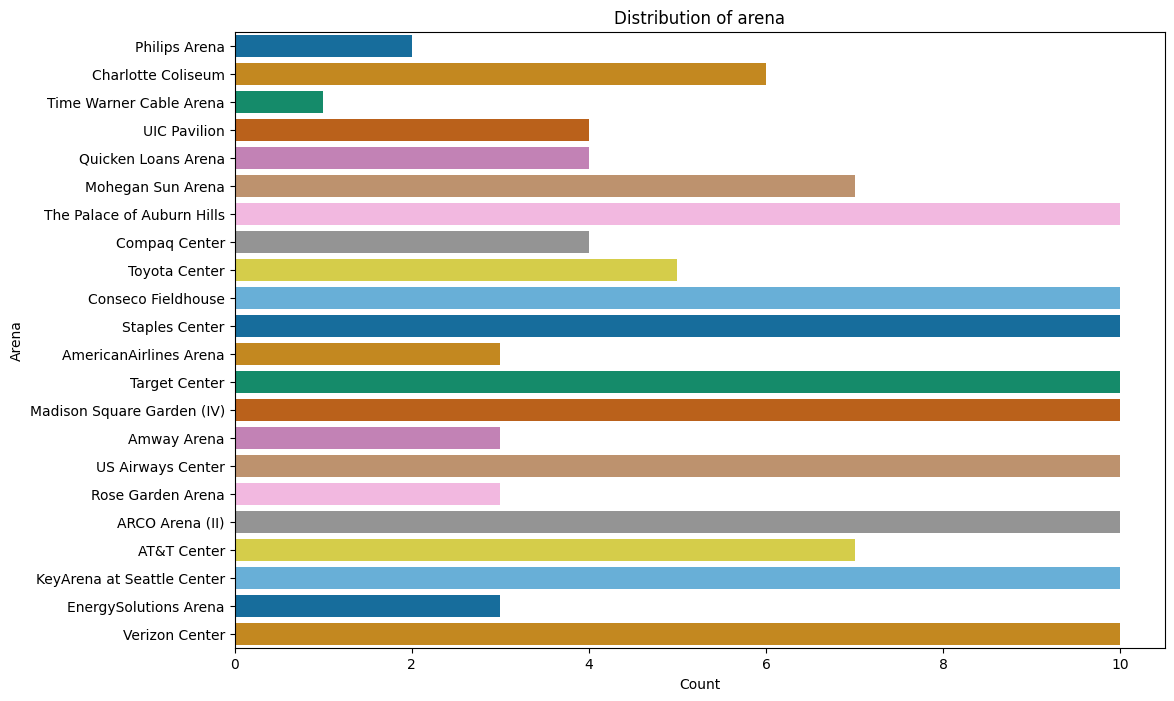

In [20]:
sns.countplot(x="confID", data=teams)
plt.title('Distribution of confID')
plt.show()

sns.countplot(x="franchID", data=teams)
plt.title('Distribution of franchID')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(y="name", data=teams, palette="colorblind")
plt.title("Distribution of name teams")
plt.xlabel("Count")
plt.ylabel("Name")
plt.show()


plt.figure(figsize=(12, 8))
sns.countplot(y="arena", data=teams, palette="colorblind")
plt.title("Distribution of arena")
plt.xlabel("Count")
plt.ylabel("Arena")
plt.show()

C:\Users\bruna\AppData\Local\Temp\ipykernel_1660\3237543917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="award", data=awards_players, palette="viridis")


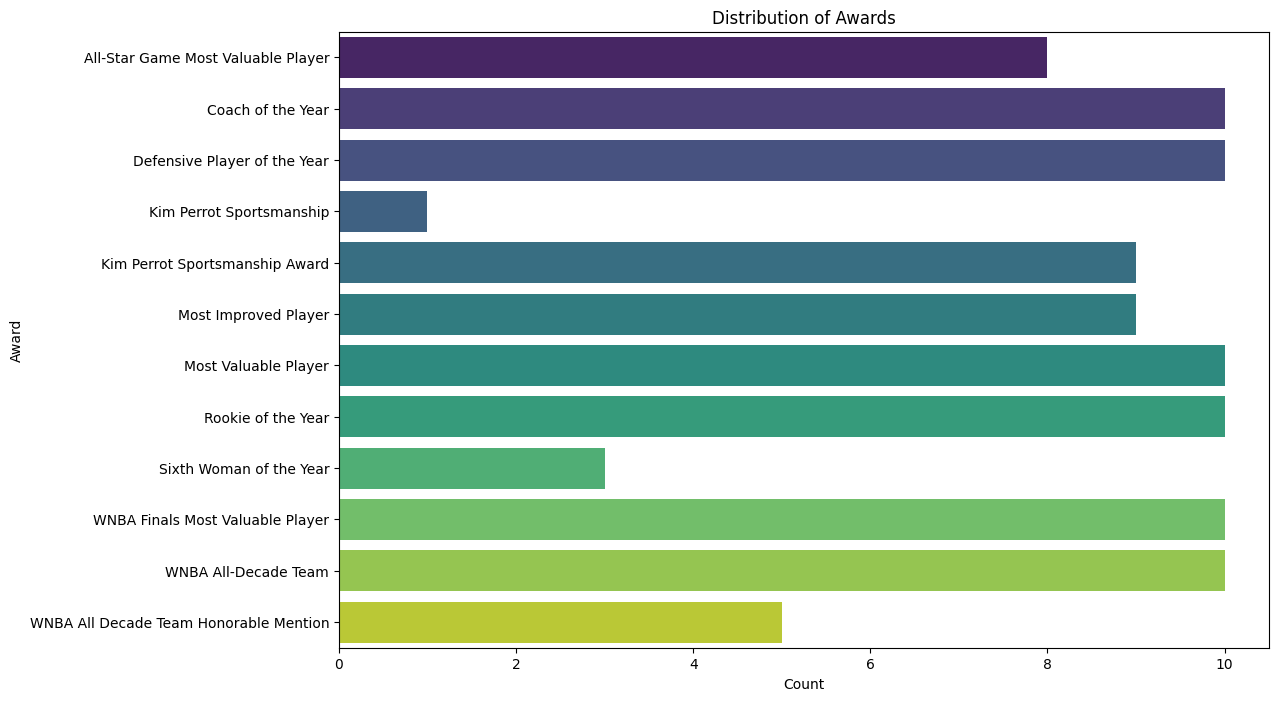

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(y="award", data=awards_players, palette="viridis")
plt.title("Distribution of Awards")
plt.xlabel("Count")
plt.ylabel("Award")
plt.show()

#### Correlation Matrix

Correlation matrix to observe the relationship between the target and the continuous features

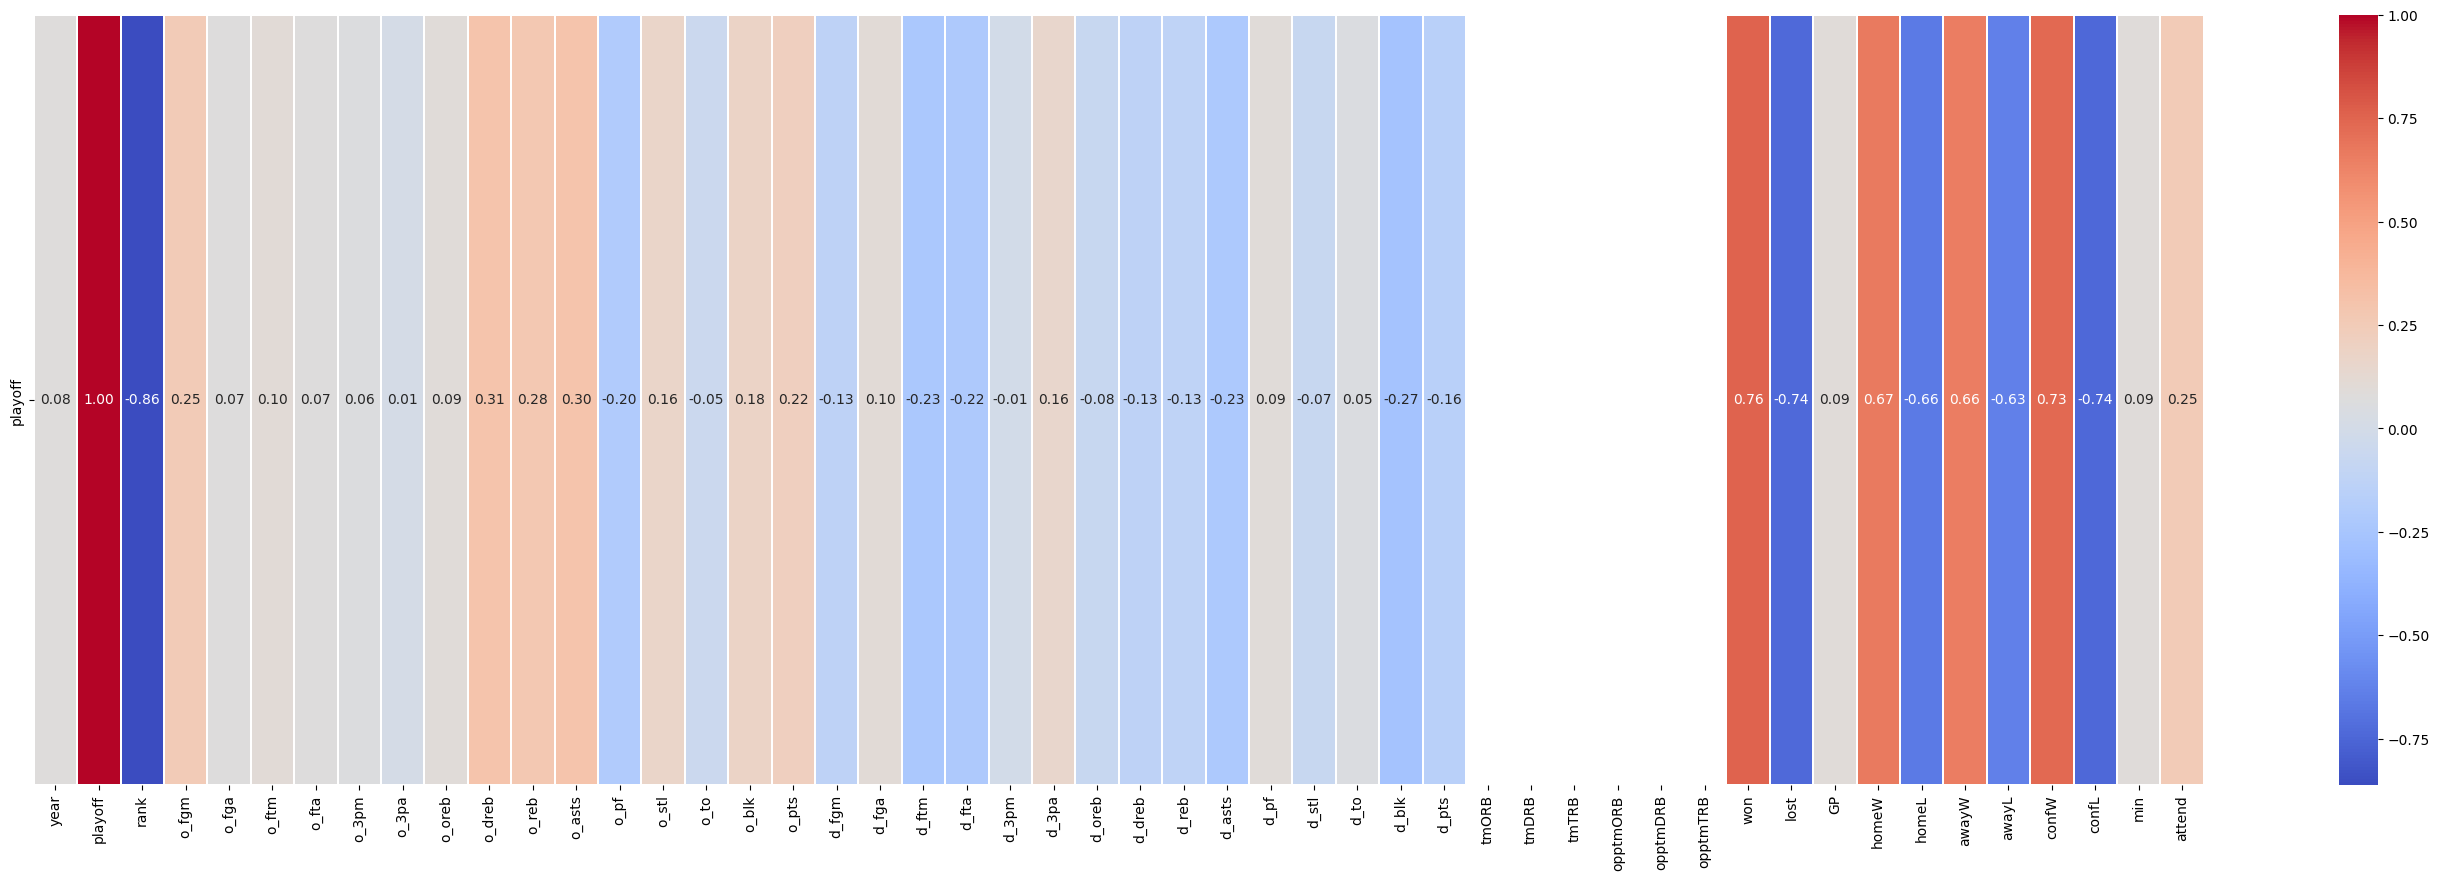

In [22]:
df = teams[['year','playoff', 'rank', 'o_fgm', 'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa', 'o_oreb', 'o_dreb', 'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_oreb', 'd_dreb', 'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB', 'won', 'lost', 'GP', 'homeW', 'homeL', 'awayW', 'awayL', 'confW', 'confL', 'min', 'attend']]
df.loc[:, 'playoff'] = df['playoff'].replace({'N': 0, 'Y': 1})

# Calculate correlation matrix
correlation_matrix = df.corr()
# Display correlation matrix

plt.figure(figsize=(35, 10))
sns.heatmap(correlation_matrix[['playoff']].transpose(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.3)
plt.show()

## Target Distribution

The dataset is slightly unbalanced

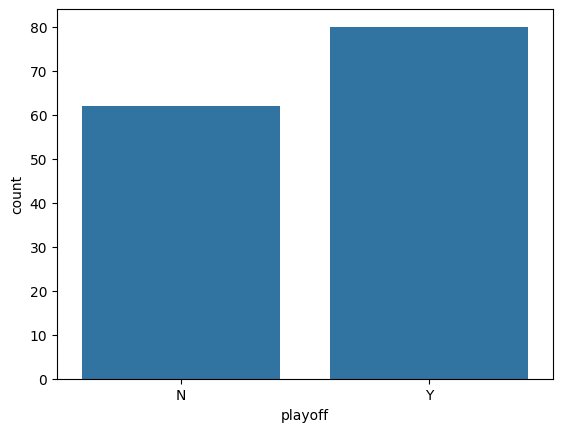

In [23]:
sns.countplot(x='playoff', data=teams)
plt.show()

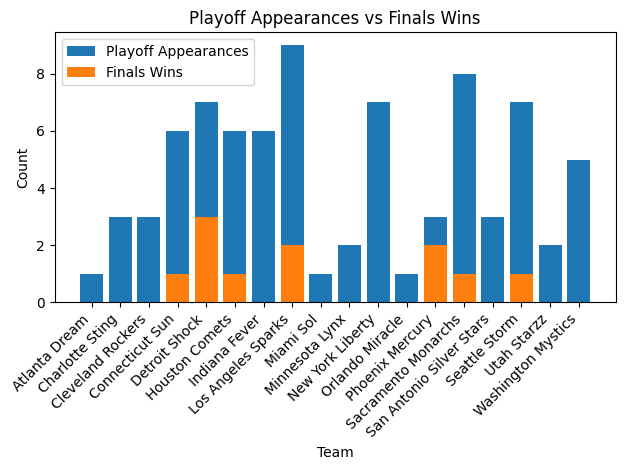

In [24]:
playoff_teams = teams[teams['playoff'] == 'Y']

# Group by team and count the number of playoff appearances and finals wins
playoff_counts = playoff_teams.groupby('name')['playoff'].count().reset_index(name='playoff_appearances')
finals_wins = playoff_teams[playoff_teams['finals'] == 'W'].groupby('name')['finals'].count().reset_index(name='finals_won')

# Merge the two counts into a single DataFrame
merge_counts = pd.merge(playoff_counts, finals_wins, on='name', how='left')

# Fill NaN values with 0 for teams that didn't win finals

# Plot the data
plt.bar(merge_counts['name'], merge_counts['playoff_appearances'], label='Playoff Appearances')
plt.bar(merge_counts['name'], merge_counts['finals_won'], label='Finals Wins')

plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Playoff Appearances vs Finals Wins')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()





